<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/AI_HW2_GD_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание 2: Градиентный спуск (base)**

В этом задании две части - теоретическая и практическая. Теорию можно набирать, используя LaTex или просто решать на листочке, сфотографировать и отправить вместе с заполненным ноутбуком в anytask.

Максимальный балл за домашнее задание: min{10, ваш балл}.

## Задание 1 (0.5 балла)



Найдите экстремумы следующих функций (вручную, где возможно) и укажите их тип (максимум, минимум):

a) $f(x) = x^2 - 30x + 1$

b) $g(x) = -x^3 + 5x - 7x^2 + 17$

c) $h(x) = x^2 - 1/x$

d) $j(x) = 1/x^5 + x^{17} + 8$

![Дз2 Мл-2.jpg](<attachment:Дз2 Мл-2.jpg>)
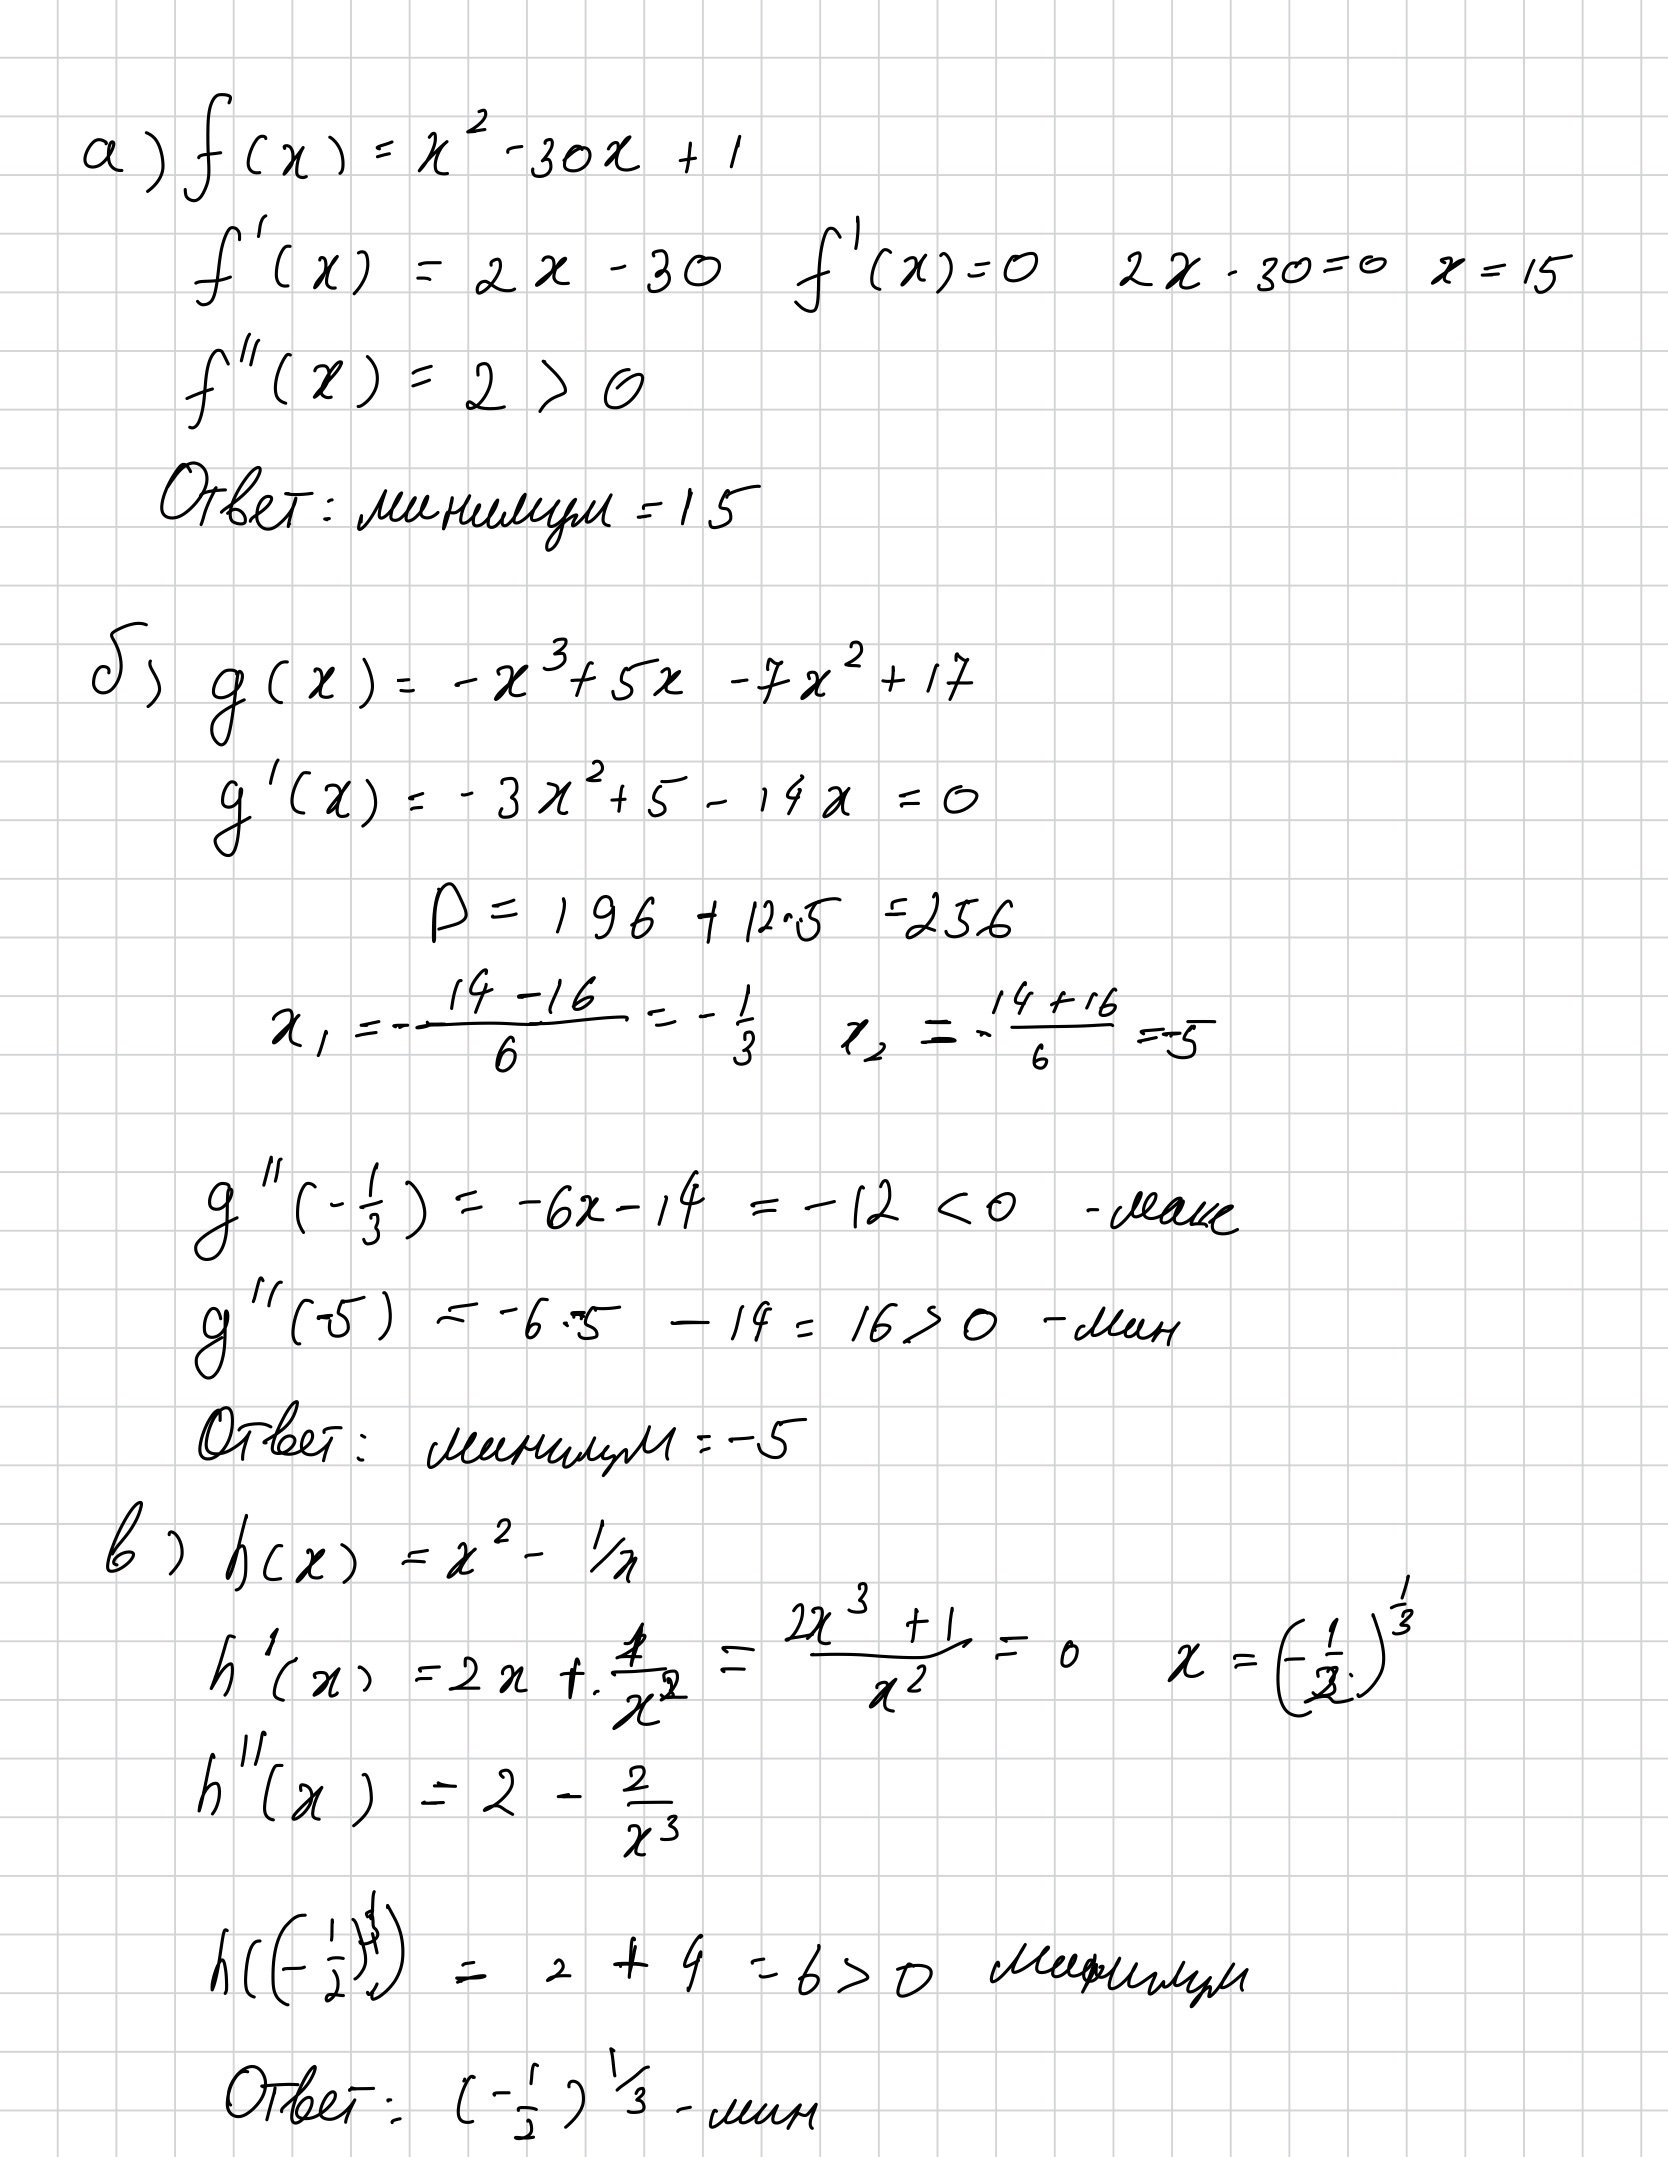

![Дз2 Мл-3.jpg](<attachment:Дз2 Мл-3.jpg>)
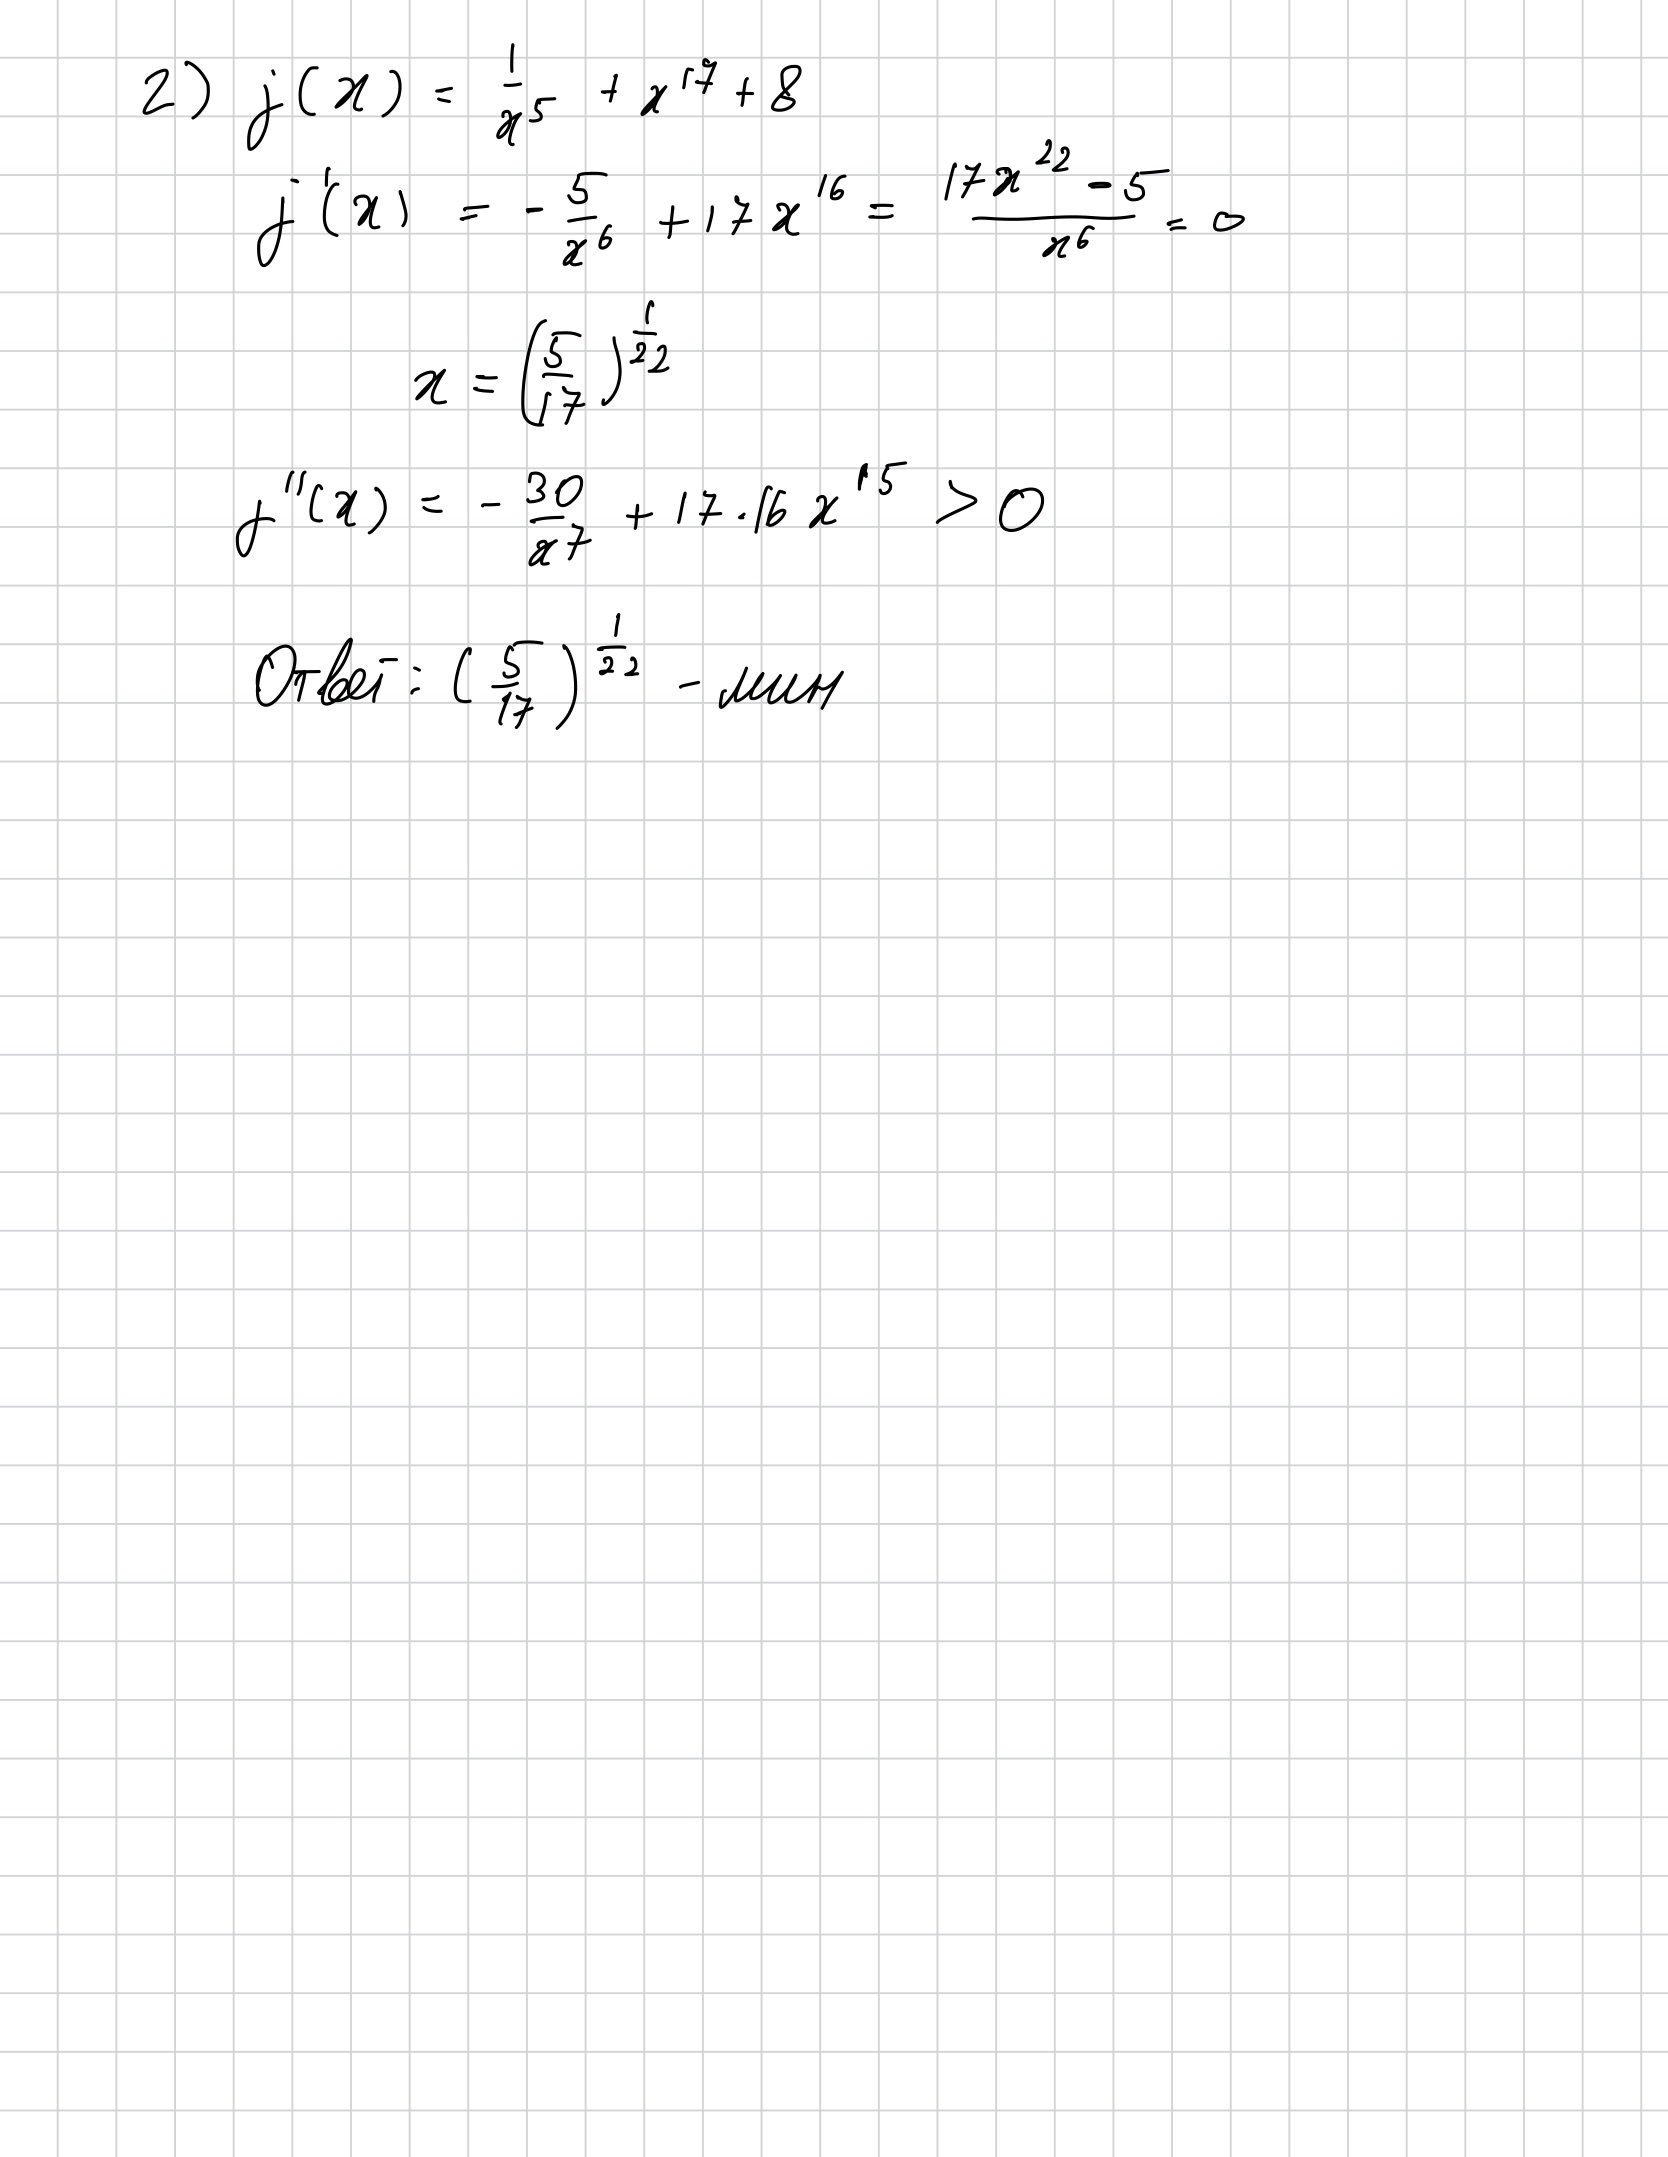

## Задание 2 (1 балл)

Найдите экстремумы этих функций в Python.

In [7]:
def f_func(x):
    return x**2 - 30*x + 1

def f_grad(x):
    return 2*x - 30

def g_func(x):
    return -x**3 + 5*x - 7*x**2 + 17

def g_grad(x):
    return -3*x**2 - 14*x + 5

def h_func(x):
    return x**2 - 1/x

def h_grad(x):
    return 2*x + 1/x**2

def j_func(x):
    return 1/x**5 + x**17 + 8

def j_grad(x):
    return -5/x**6 + 17*x**16

In [2]:
import sympy as sp

def find_extremums(func, var):
    try:
        first_derivative = sp.diff(func, var)

        critical_points = sp.solve(first_derivative, var)

        second_derivative = sp.diff(first_derivative, var)

        extremums = []

        for point in critical_points:
            second_val = second_derivative.subs(var, point)

            if second_val > 0:
                extremum_type = 'minimum'
            elif second_val < 0:
                extremum_type = 'maximum'
            else:
                extremum_type = 'inconclusive'

            function_value = func.subs(var, point)
            
            extremums.append((point, function_value, extremum_type))
    except Exception as e:
        print(e)
    
    return extremums

x = sp.symbols('x', real=True)
f = x**2 - 30*x + 1
g = -x**3 + 5*x - 7*x**2 + 17
h = x**2 - 1/x
j = 1/x**5 + x**17 + 8

extremums_f = find_extremums(f, x)
extremums_g = find_extremums(g, x)
extremums_h = find_extremums(h, x)
extremums_j = find_extremums(j, x)

print("Экстремумы функции f(x):", extremums_f)
print("Экстремумы функции g(x):", extremums_g)
print("Экстремумы функции h(x):", extremums_h)
print("Экстремумы функции j(x):", extremums_j)

Экстремумы функции f(x): [(15, -224, 'minimum')]
Экстремумы функции g(x): [(-5, -58, 'minimum'), (1/3, 482/27, 'maximum')]
Экстремумы функции h(x): [(-2**(2/3)/2, 3*2**(1/3)/2, 'minimum')]
Экстремумы функции j(x): [(-17**(21/22)*5**(1/22)/17, -22*17**(5/22)*5**(17/22)/85 + 8, 'maximum'), (17**(21/22)*5**(1/22)/17, 22*17**(5/22)*5**(17/22)/85 + 8, 'minimum')]


## Задание 3 (1 балл)

Найдите точки перегиба функций из задания 1 (вручную, где возможно).

## Задание 4 (1 балла)

Найдите точки перегиба этих функций в Python.

In [3]:
def find_extremums_and_inflexions(func, var):
    first_derivative = sp.diff(func, var)
    second_derivative = sp.diff(first_derivative, var)
    
    critical_points = list(filter(lambda cp: cp.is_real, sp.solve(first_derivative, var)))
    inflection_points = list(filter(lambda ip: ip.is_real, sp.solve(second_derivative, var)))

    return critical_points, inflection_points

extremums_f, inflections_f = find_extremums_and_inflexions(f, x)
extremums_g, inflections_g = find_extremums_and_inflexions(g, x)
extremums_h, inflections_h = find_extremums_and_inflexions(h, x)
extremums_j, inflections_j = find_extremums_and_inflexions(j, x)

print("Перегибы функции f(x):", inflections_f)
print("Перегибы функции g(x):", inflections_g)
print("Перегибы функции h(x):", inflections_h)
print("Перегибы функции j(x):", inflections_j)

Перегибы функции f(x): []
Перегибы функции g(x): [-7/3]
Перегибы функции h(x): [1]
Перегибы функции j(x): []


### Внимание! Далее все задания необходимо выполнять для ВСЕХ функций из задания 1!

## Задание 5 (1 балл)

Постройте графики функций из задания 1 в Python (не забудьте подписать оси и сами графики):
*   изобразите графики с подписанными осями
*   отметьте одним цветом локальные экстремумы
*   отметьте другим цветом точки перегиба
*   подпишите на оси x значения экстремумов и точек перегиба

P.S. Для того, чтобы отметить точку на графике, вам понадобится функция (plt.scatter), а для того, чтобы подписать её значение на оси (plt.annotate).

Пример хорошего графика:

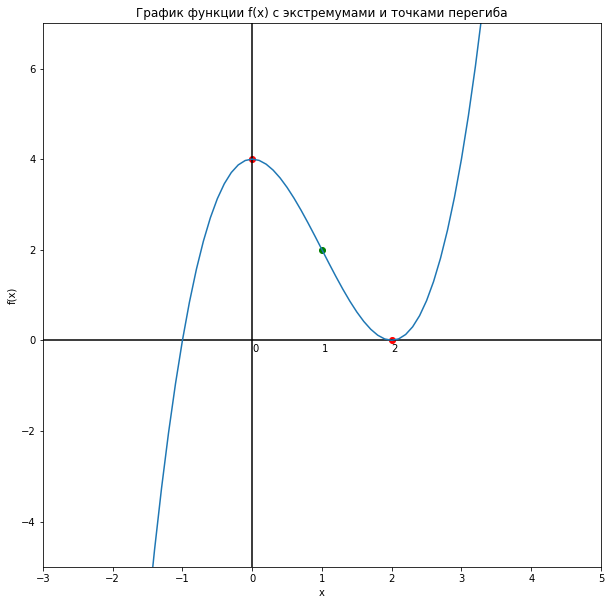

In [4]:
import numpy as np
x_vals = np.linspace(-10, 20, 400)

f_lambdified = sp.lambdify(x, f, modules=["numpy"])
g_lambdified = sp.lambdify(x, g, modules=["numpy"])
h_lambdified = sp.lambdify(x, h, modules=["numpy"])
j_lambdified = sp.lambdify(x, j, modules=["numpy"])

<lambdifygenerated-3>:2: RuntimeWarning: divide by zero encountered in divide
  return x**2 - 1/x
<lambdifygenerated-4>:2: RuntimeWarning: divide by zero encountered in power
  return x**17 + 8 + x**(-5.0)


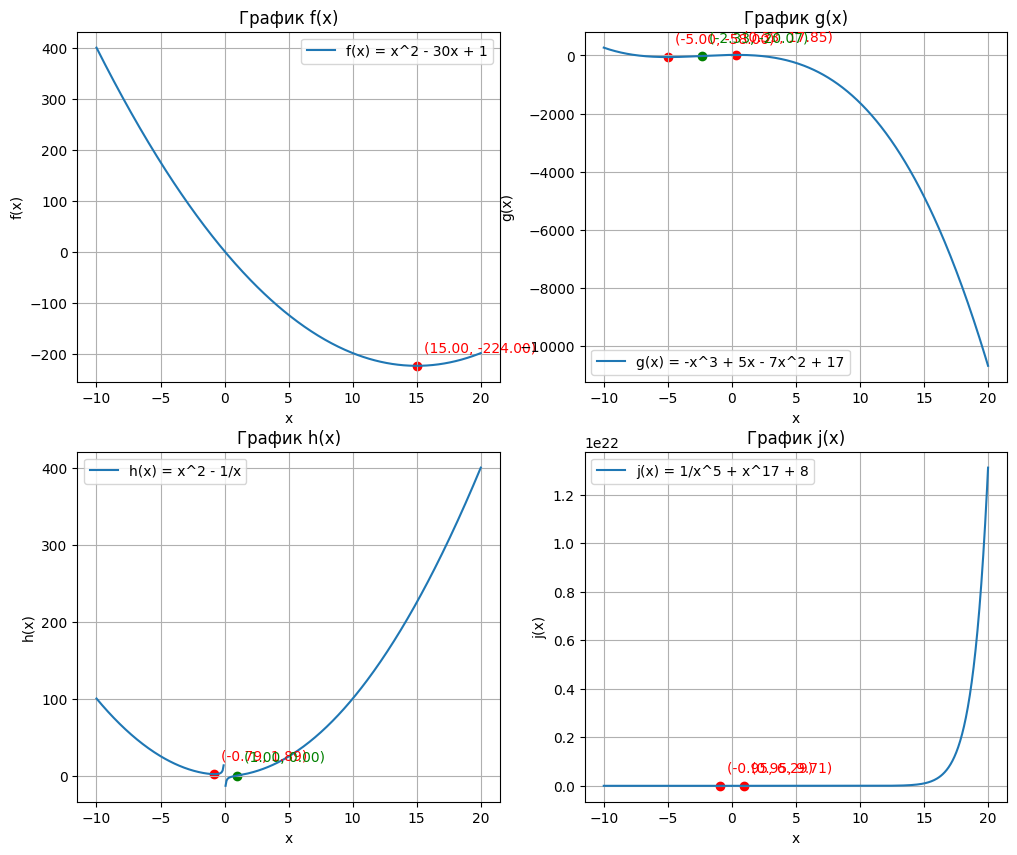

In [5]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(12, 10))


def plot_extremus(indx=(0, 0), func=f, func_labmd=f_lambdified, 
    extremums=extremums_f, inflections=inflections_f, 
    label='f(x) = x^2 - 30x + 1', name_func='f(x)'):

    axs[indx].plot(x_vals, func_labmd(x_vals), label=label)
    for point in extremums:
        val = func.subs(x, point).evalf()
        axs[indx].scatter(float(point), float(val), color='red')
        axs[indx].annotate(f'({float(point):.2f}, {float(val):.2f})', xy=(float(point), float(val)),
                        xytext=(5, 10), textcoords='offset points', color='red')


    for point in inflections:
        val = func.subs(x, point).evalf()
        axs[indx].scatter(float(point), float(val), color='green')
        axs[indx].annotate(f'({float(point):.2f}, {float(val):.2f})', xy=(float(point), float(val)),
                        xytext=(5, 10), textcoords='offset points', color='green')
    axs[indx].set_title(f'График {name_func}')
    axs[indx].set_xlabel('x')
    axs[indx].set_ylabel(name_func)
    axs[indx].legend()
    axs[indx].grid()

plot_extremus((0, 0), f, f_lambdified, extremums_f, inflections_f, 'f(x) = x^2 - 30x + 1', 'f(x)')
plot_extremus((0, 1), g, g_lambdified, extremums_g, inflections_g,'g(x) = -x^3 + 5x - 7x^2 + 17', 'g(x)')
plot_extremus((1, 0), h, h_lambdified, extremums_h, inflections_h, 'h(x) = x^2 - 1/x', 'h(x)')
plot_extremus((1, 1), j, j_lambdified, extremums_j, inflections_j,'j(x) = 1/x^5 + x^17 + 8', 'j(x)')

## Задание 6 (1 балл)

Модифицируйте функцию, осуществляющую метод градиентного спуска с семинара: добавьте опцию останавливать метод, если абсолютное значение производной функции в точке < некоторого $\delta$ (delta добавьте в аргументы функции).

In [46]:
def gradient_descent(func, x_start, learning_rate, epsilon, num_iterations, delta):
    x_curr = x_start

    df_x = sp.diff(func, x)

    trace = []
    trace.append(x_curr)

    for i in range(num_iterations):
        df_curr = df_x.subs(x, x_curr)  
        x_new = x_curr - learning_rate * df_curr
        trace.append(x_new)

        if abs(df_curr) < delta:
            return x_curr, trace

        if abs(x_new - x_curr) < epsilon:
            return x_curr, trace

        x_curr = x_new

    return x_curr, trace

f_xmin, f_trace = gradient_descent(f, 3, 0.01, 0.001, 10, 0.001)
g_xmin, g_trace = gradient_descent(g, 3, 0.01, 0.001, 10, 0.01)
h_xmin, h_trace = gradient_descent(h, 3, 0.01, 0.001, 10, 0.01)
j_xmin, j_trace = gradient_descent(j, 3, 0.01, 0.001, 10, 0.01)

print(f"{f_xmin=}, {len(f_trace)=}")
print(f"{g_xmin=}, {len(g_trace)=}")
print(f"{h_xmin=}, {len(h_trace)=}")
print(f"{j_xmin=}, {len(j_trace)=}")

f_xmin=5.19512631734944, len(f_trace)=11
g_xmin=393.092137670857, len(g_trace)=11
h_xmin=2.43880835714835, len(h_trace)=11
j_xmin=-7.06222008776536e+468191664580, len(j_trace)=11


## Задание 7 (1 балл)

Подберите начальное приближение (сделайте несколько запусков из случайной начальной точки) и шаг градиентного спуска таким образом, чтобы процедура выдавала правильное значение наименьшего локального минимума функций (если он есть):
- [ ] в качестве результата выведите на экран значение начального приближения ($x_0$), `learning_rate`
- [ ] нарисуйте график функции и изобразите на нём наименьший из найденных локальных минимумов; на оси $x$ подпишите значение этого минимума. \
(Постарайтесь сделать реализацию графика в виде функции, чтобы оптимизировать процесс. Потом функция понадобится вам в задании 9, но это не обязательное требование).
- [ ] если такой точки у функции нет, поясните это текстом при помощи Markdown

In [51]:
def plot_function_and_minimum(func, x_min):
    x_vals = np.linspace(-20, 20, 400)
    f_lambdified = sp.lambdify(sp.symbols('x'), func, "numpy")
    y_vals = f_lambdified(x_vals)

    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, y_vals, label='f(x)', color='blue')
    plt.scatter(x_min, f_lambdified(x_min), color='red')  # Отметим минимум
    plt.text(x_min, f_lambdified(x_min), f'Min: {x_min:.2f}', fontsize=10, verticalalignment='bottom')
    plt.title('График функции и локальный минимум')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.axhline(0, color='black',linewidth=0.5, ls='--')
    plt.axvline(0, color='black',linewidth=0.5, ls='--')
    plt.legend()
    plt.grid()
    plt.show()

Начальное приближение: x0 = -4.70, learning_rate = 0.01
Найденный минимум: 12.39


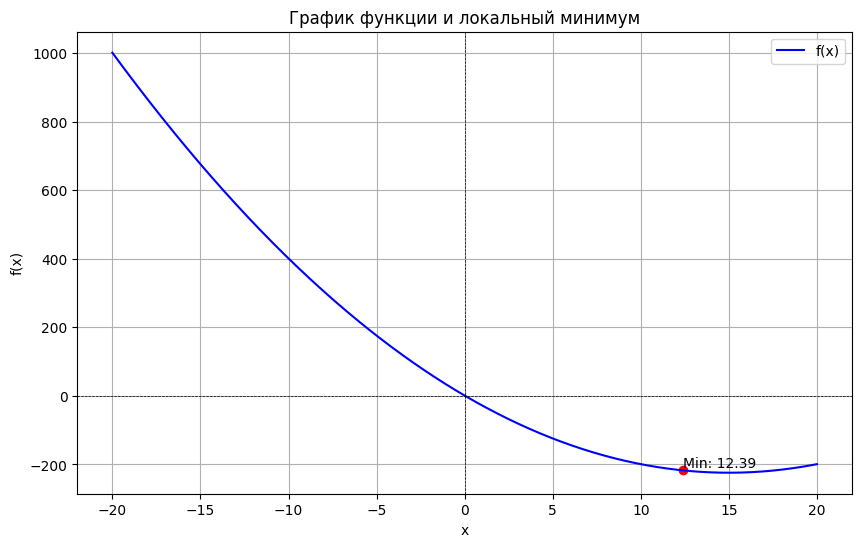

In [61]:
def count_best_lr(func):
    num_iterations = 100
    epsilon = 1e-6
    delta = 1e-6

    best_min = None
    best_x_start = None
    best_learning_rate = None
    min_value = float('inf')

    for learning_rate in [0.1, 0.05, 0.01]:
        for x_start in np.random.uniform(-10, 10, 10):
            result, trace = gradient_descent(func, x_start, learning_rate, epsilon, num_iterations, delta)

            if result < min_value:
                min_value = result
                best_min = result
                best_x_start = x_start
                best_learning_rate = learning_rate

    print(f"Начальное приближение: x0 = {best_x_start:.2f}, learning_rate = {best_learning_rate:.2f}")
    try:
        print(f"Найденный минимум: {best_min:.2f}")
    except Exception as e:
        print(e)

    plot_function_and_minimum(func, best_min)

count_best_lr(f)

Начальное приближение: x0 = -9.72, learning_rate = 0.01
Найденный минимум: -5.00


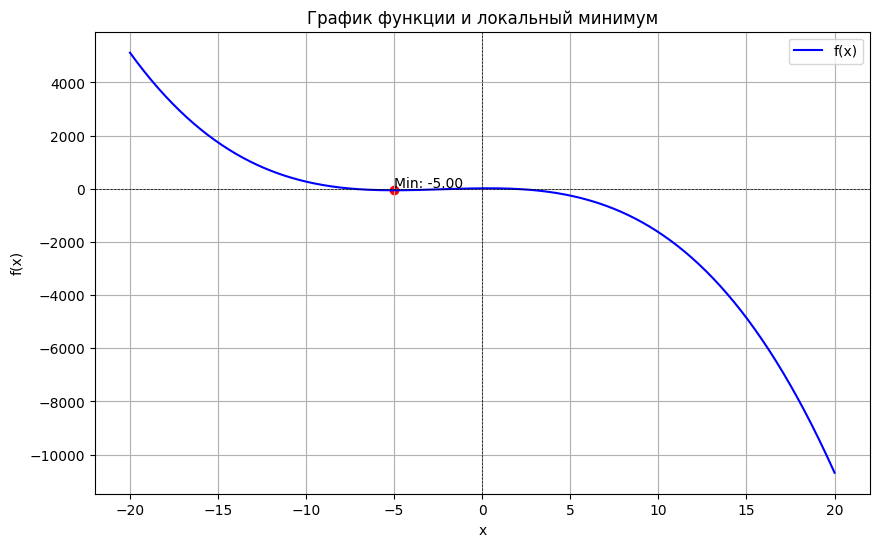

In [54]:
count_best_lr(g)

Начальное приближение: x0 = 0.21, learning_rate = 0.01
Найденный минимум: -1.64


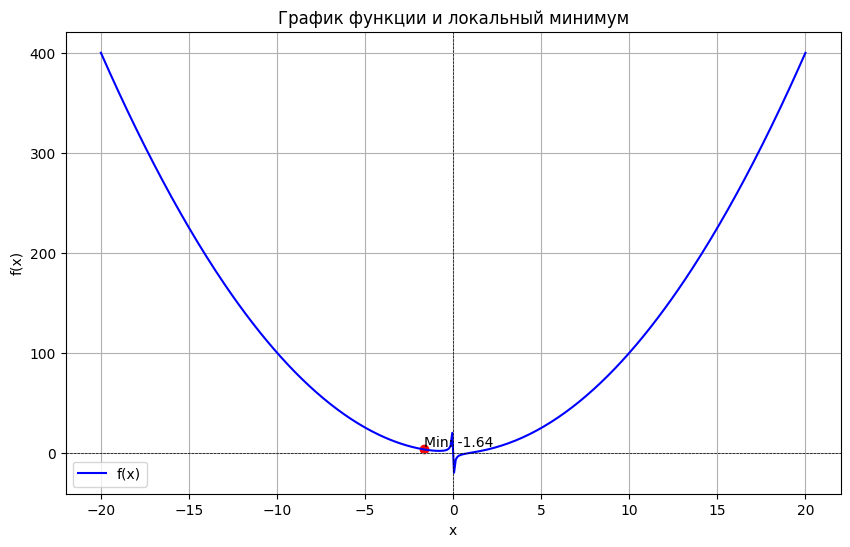

In [55]:
count_best_lr(h)

Начальное приближение: x0 = -9.41, learning_rate = 0.10
[<class 'decimal.InvalidOperation'>]


InvalidOperation: [<class 'decimal.InvalidOperation'>]

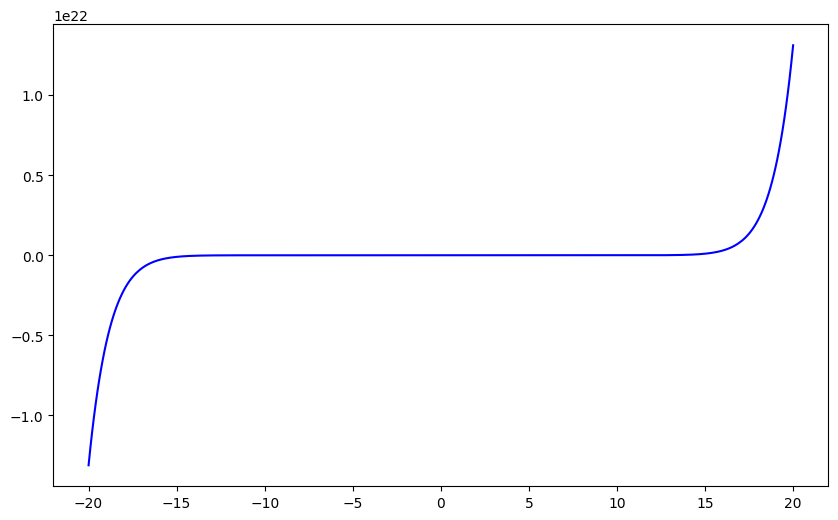

In [62]:
count_best_lr(j)

Там там только комлексные корни

## Задание 8 (1.5 балла)

Реализуйте [метод Ньютона](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization) (метод второго порядка) для поиска минимума функции.

Про метод ещё можно почитать [здесь](https://math.semestr.ru/optim/minimum.php).

In [71]:
def newton_method(f, x_start, epsilon, num_iterations):
    
    df_x = sp.diff(f, x)    
    d2f_x = sp.diff(df_x, x) 

    x_curr = x_start
    trace = []
    trace.append(x_curr)

    for i in range(num_iterations):
        df_curr = df_x.subs(x, x_curr)     
        d2f_curr = d2f_x.subs(x, x_curr)   

        if d2f_curr == 0:
            print("Вторая производная в данной точке равна нулю. Метод Ньютона не может быть применен.")
            return x_curr, trace

        x_new = x_curr - df_curr / d2f_curr
        trace.append(x_new)

        if abs(x_new - x_curr) < epsilon:
            return x_new, trace

        x_curr = x_new

    return x_curr, trace

## Задание 9 (0.5 балла)

Примените метод Ньютона для поиска минимума указанных функций (в ответе выведите подходящее значение начальной точки, график с найденным и подписанным значением минимума, как в задании 7).

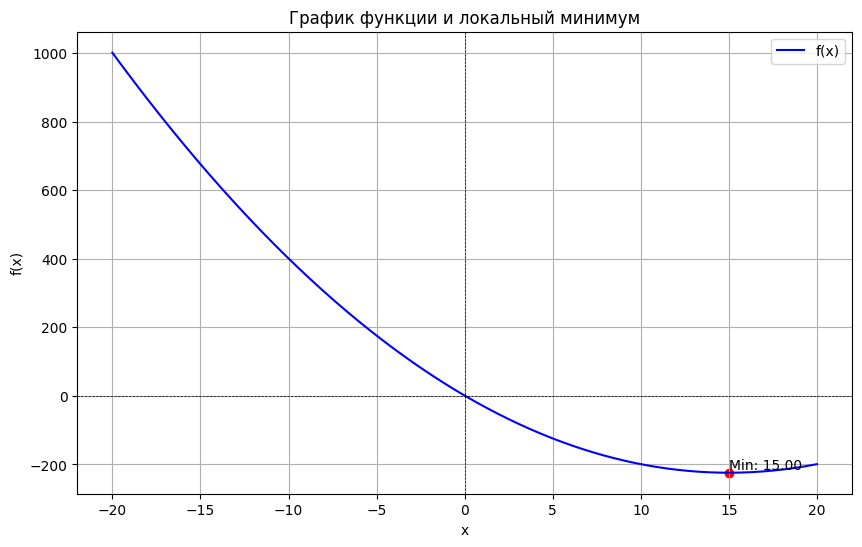

Найденный минимум: x = 15.00


In [72]:
x_start = -5
epsilon = 1e-6
num_iterations = 100

result, trace = newton_method(f, x_start, epsilon, num_iterations)
plot_function_and_minimum(f, result)

print(f"Найденный минимум: x = {result:.2f}")

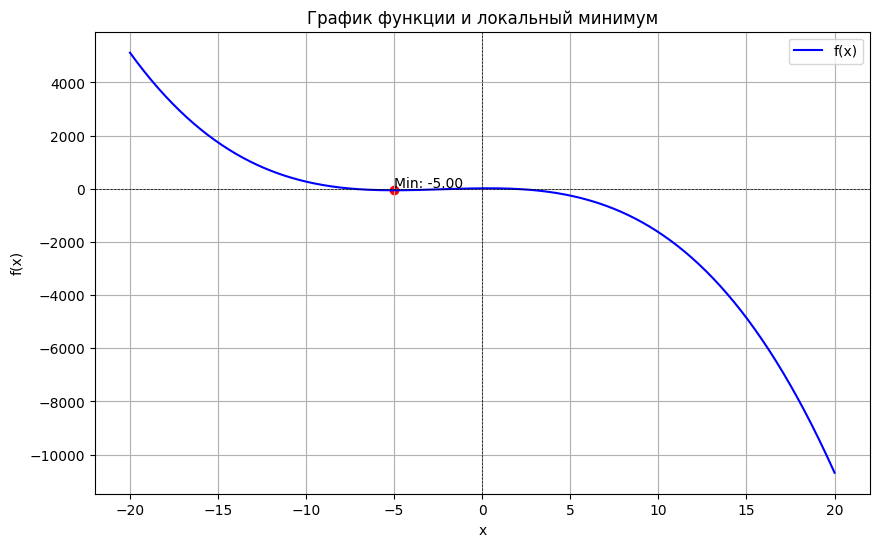

Найденный минимум: x = -5.00


In [73]:
result, trace = newton_method(g, x_start, epsilon, num_iterations)
plot_function_and_minimum(g, result)

print(f"Найденный минимум: x = {result:.2f}")

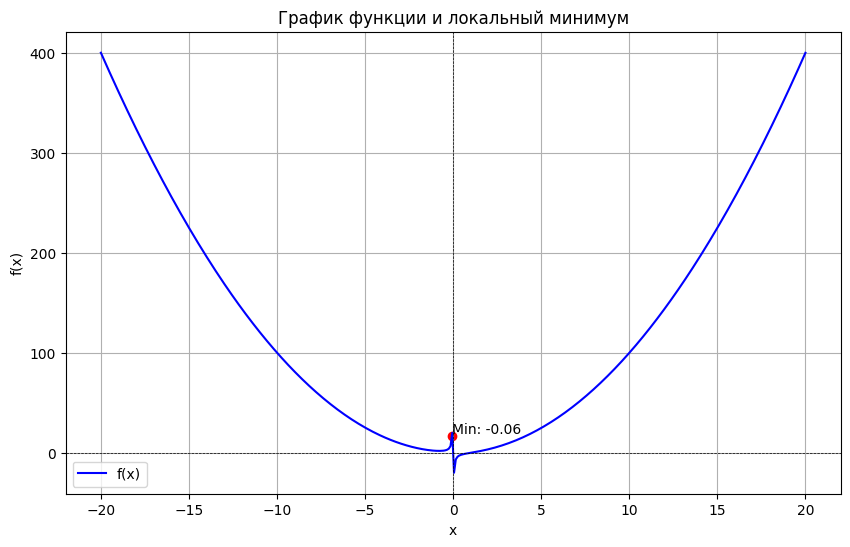

Найденный минимум: x = -0.06


In [78]:
result, trace = newton_method(h, x_start, epsilon, 1)
plot_function_and_minimum(h, result)

print(f"Найденный минимум: x = {result:.2f}")

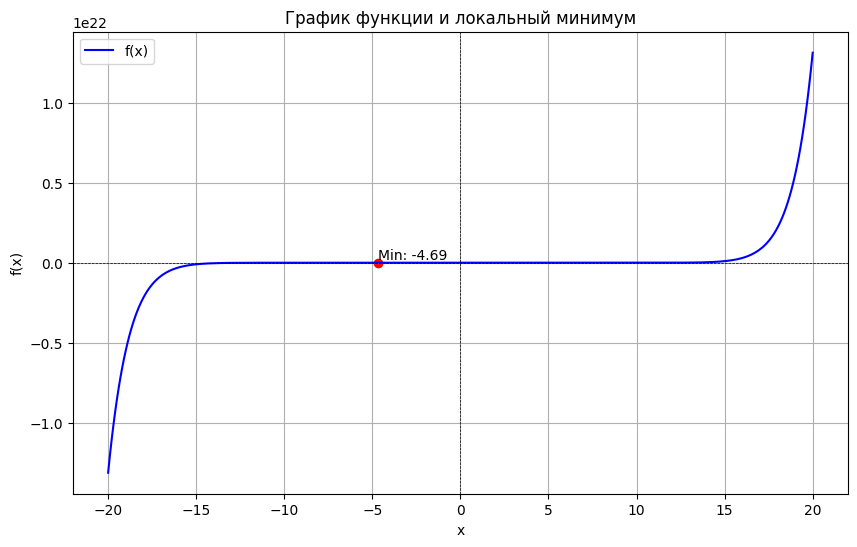

Найденный минимум: x = -4.69


In [79]:
result, trace = newton_method(j, x_start, epsilon, 1)
plot_function_and_minimum(j, result)

print(f"Найденный минимум: x = {result:.2f}")

## Задание 10 (1 балл)

Сравните скорость работы градиентного спуска и метода Ньютона при одинаковой точности решения $|x_{found}-x_{true}|<10^{-5}$:
* за сколько итераций каждый метод сходится (в среднем по всем функциям для правильно подобранных значений гиперпараметров)? Какой быстрее?
* какой метод дает более точный результат при фиксированном числе итераций $N=10$? (для ответа на этот вопрос добавьте в процедуру градиентного спуска возможность останавливаться при достижении некоторого количества итераций $N$)

In [93]:
def compare_methods(func, true_min, num_trials):
    epsilon = 1e-5
    gsd_iters = []
    nm_iters = []
    learning_rates = [0.1, 0.05, 0.01, 0.001]
    num_iter = 10
    for _ in range(num_trials):
        x_start_gd = np.random.uniform(-10, 10)
        best_gd_iters = np.inf
        for lr in learning_rates:

            _, iters = gradient_descent(func, x_start_gd, lr, epsilon, num_iter, 0.01)
            best_gd_iters = min(best_gd_iters, len(iters))
        
        gsd_iters.append(best_gd_iters)

        x_start_nm = np.random.uniform(-10, 10)
        nm_result, iters = newton_method(func, x_start_nm, epsilon, num_iter)
        nm_iters.append(len(iters))

    print(f"Градиентный спуск: среднее кол-во итераций до сходимости: {np.mean(gsd_iters):.2f}")
    print(f"Метод Ньютона: среднее кол-во итераций до сходимости: {np.mean(nm_iters):.2f}")

compare_methods(f, 15, 100)
compare_methods(g, -5, 100)
compare_methods(h, -1, 100)
compare_methods(j, 0, 100)


Градиентный спуск: среднее кол-во итераций до сходимости: 11.00
Метод Ньютона: среднее кол-во итераций до сходимости: 3.00
Градиентный спуск: среднее кол-во итераций до сходимости: 9.67
Метод Ньютона: среднее кол-во итераций до сходимости: 6.28
Градиентный спуск: среднее кол-во итераций до сходимости: 10.73
Метод Ньютона: среднее кол-во итераций до сходимости: 10.29
Градиентный спуск: среднее кол-во итераций до сходимости: 11.00
Метод Ньютона: среднее кол-во итераций до сходимости: 10.80


## **Бонусная часть**

## Задание 11 (1 балл)

Реализуйте оптимизацию метода градиентного спуска - Momentum. Необходимые выкладки вы можете подсмотреть [здесь](https://education.yandex.ru/handbook/ml/article/optimizaciya-v-ml).

In [94]:
def gradient_descent_momentum(f, x_start, learning_rate, beta, epsilon, num_iterations):
    df_x = sp.diff(f, x) 
    x_curr = x_start
    v = 0  
    trace = []

    for i in range(num_iterations):
        df_curr = df_x.subs(x, x_curr)  
        v = beta * v + (1 - beta) * df_curr  
        x_new = x_curr - learning_rate * v 

        trace.append(x_new)

        if abs(x_new - x_curr) < epsilon:
            return x_new, i + 1

        x_curr = x_new

    return x_curr, num_iterations

In [100]:
x_start = -5
epsilon = 1e-6
num_iterations = 100
lr=0.1
beta = 0.9

result, trace = gradient_descent_momentum(f, x_start, lr, beta, epsilon, num_iterations)
print(f"{result=}, {trace=}")

result=14.9154377256374, trace=100


In [101]:
result, trace = gradient_descent_momentum(g, x_start, lr, beta, epsilon, num_iterations)
print(f"{result=}, {trace=}")

result=-5, trace=1


In [102]:
result, trace = gradient_descent_momentum(h, x_start, lr, beta, epsilon, num_iterations)
print(f"{result=}, {trace=}")

result=-0.813682094296128, trace=100


In [103]:
result, trace = gradient_descent_momentum(j, x_start, lr, beta, epsilon, num_iterations)
print(f"{result=}, {trace=}")

result=-1.73519026946583e+1672436996566427351964074722832681054618457332497104862836874986762838842327049230556466055298493077173862057235650571215, trace=100


## Задание 12 (0.5 балла)

Проверьте, решает ли Momentum GD проблему поиска начального приближения для функций из задания 1?

Решает

## **Часть Котобонус** 🐈

Ура-ура, с вами снова кот, который может добавить вам баллы!
- 0.25, если вы угадаете, чей он
- 0.05 если просто предположите

**Подсказка:** кот одной из наших замечательных ассистенток!


[Кайфующий кот](https://ibb.co/12WN7wg)

Пусть будет Яна